Part 3 @ Part 4:

In [168]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import imageio.v2 as iio
from scipy.signal import medfilt
from skimage import io, img_as_float
from skimage.restoration import denoise_nl_means
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
from skimage import io, color
import cv2

In [281]:
def calculate_snr(img1, img2):
    img1 = np.array(img1, dtype=np.float64)
    img2 = np.array(img2, dtype=np.float64)
    mean_img1 = np.mean((img1 ** 2))
    mse = np.mean((img1 - img2) ** 2)
    snr = 10 * np.log10(mean_img1 / mse)
    return snr

def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    max_pixel_value = 255.0
    psnr = 20 * np.log10(max_pixel_value / np.sqrt(mse))
    return psnr



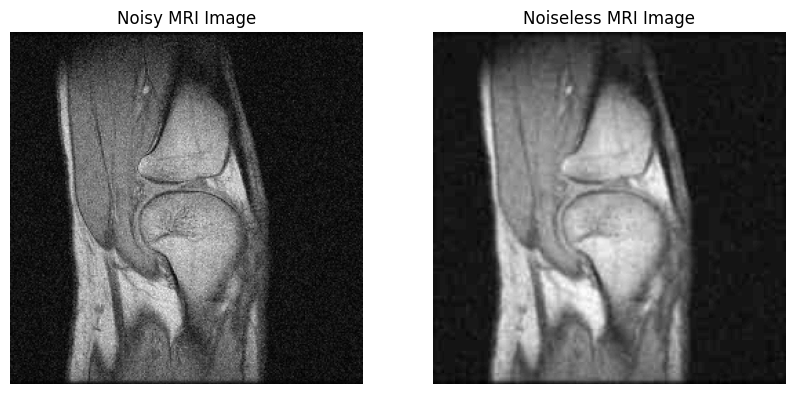

The SNR value : 2.916509323033147 dB
The PSNR value : 12.16490039737391 dB


In [283]:
mat_data = scipy.io.loadmat('rawkneedata.mat')
k_space_data = mat_data['dat']
reconstructed_image = np.fft.ifft2(k_space_data)
reconstructed_image_magnitude = np.abs(reconstructed_image)
shifted_reconstructed_image = np.fft.fftshift(reconstructed_image_magnitude)
noisy = np.array(shifted_reconstructed_image, dtype=np.float64)

img1_path = 'knee.png'
img2_path = 'kneeMRI.png'
img1 = np.array(iio.imread(img1_path), dtype=np.float64)
img2 = np.array(iio.imread(img2_path), dtype=np.float64)
# Plot the reconstructed MRI image
fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(noisy, cmap='gray')
plt.axis('off')  # Turn off axis
plt.title('Noisy MRI Image')
plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.axis('off')  # Turn off axis
plt.title('Noiseless MRI Image')
plt.show()
print(f"The SNR value : {calculate_snr(img1, img2)} dB")
print(f"The PSNR value : {calculate_psnr(img1, img2)} dB")

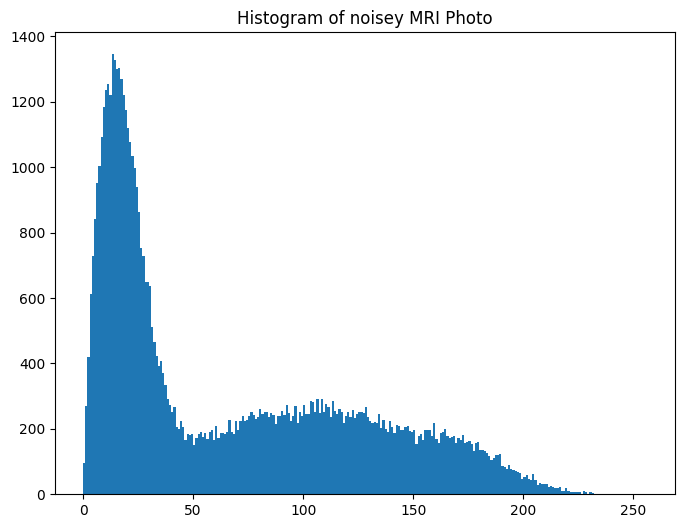

In [209]:
image = Image.open('knee.png')
image_array = np.array(image)
plt.figure(figsize=(8, 6))
plt.title('Histogram of noisey MRI Photo')
plt.hist(image_array.ravel(), 256, [0, 256])
plt.show()

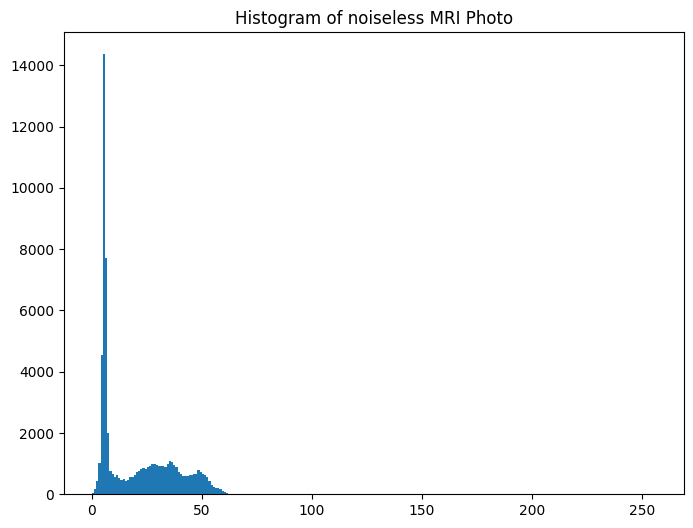

In [55]:
image = Image.open('kneeMRI.png')
image_array = np.array(image)
plt.figure(figsize=(8, 6))
plt.title('Histogram of noiseless MRI Photo')
plt.hist(image_array.ravel(), 256, [0, 256])
plt.show()

In [ ]:
##Mean Filter

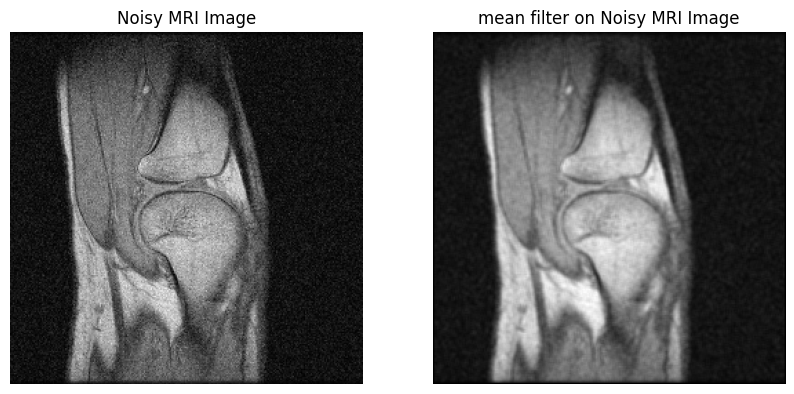

The SNR value : 3.029807915694389 dB
The PSNR value : 27.59967729093033 dB


In [284]:
def apply_mean_filter(input_image):
    image_array = np.array(input_image)
    height, width = image_array.shape
    filtered_image_array = np.zeros((height, width), dtype=np.uint8)
    for i in range(1, height-1):
        for j in range(1, width-1):
            mean_value = np.mean(image_array[i-1:i+2, j-1:j+2])
            filtered_image_array[i, j] = mean_value.astype(np.uint8)

    filtered_image = Image.fromarray(filtered_image_array)
    return filtered_image

img1_path = 'mean.png'
img2_path = 'kneeMRI.png'
img1 = iio.imread(img1_path)
img2 = iio.imread(img2_path)
filtered_image = apply_mean_filter(np.array(np.array(iio.imread('knee.png'), dtype=np.float64), dtype=np.float64))
fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(shifted_reconstructed_image, cmap='gray')
plt.axis('off')  # Turn off axis
plt.title('Noisy MRI Image')
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')  # Turn off axis
plt.title('mean filter on Noisy MRI Image')
plt.show()

print(f"The SNR value : {calculate_snr(filtered_image, img2)} dB")
print(f"The PSNR value : {calculate_psnr(filtered_image, img2)} dB")


In [ ]:
##Median Filter

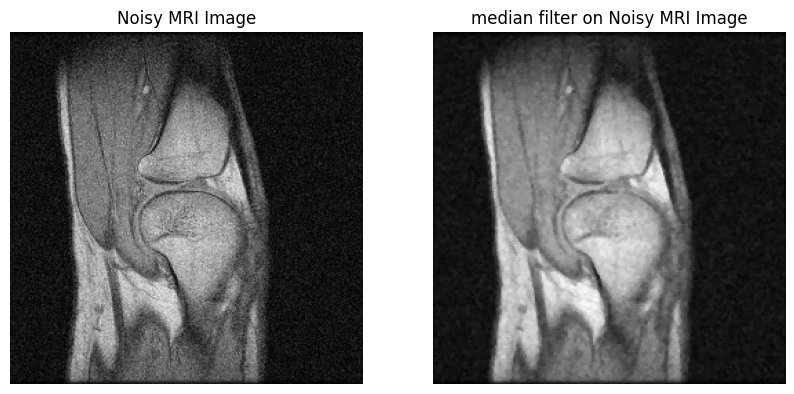

The SNR value : 3.0053442607225653 dB
The PSNR value : 27.83852310118251 dB


In [285]:
def apply_median_filter(image, kernel_size):
    if len(np.array(image).shape) > 2:
        image = np.array(image.convert('L'))
    filtered_image = medfilt(image, kernel_size)
    return filtered_image
input_image = Image.open('knee.png')
filtered_image = apply_median_filter(input_image, kernel_size=3)

filtered_imagee = np.array(filtered_image, dtype=np.float64)
fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(shifted_reconstructed_image, cmap='gray')
plt.axis('off')  # Turn off axis
plt.title('Noisy MRI Image')
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')  # Turn off axis
plt.title('median filter on Noisy MRI Image')
plt.show()
print(f"The SNR value : {calculate_snr(filtered_imagee, img2)} dB")
print(f"The PSNR value : {calculate_psnr(filtered_image, img2)} dB")



In [ ]:
##Gaussian Filter

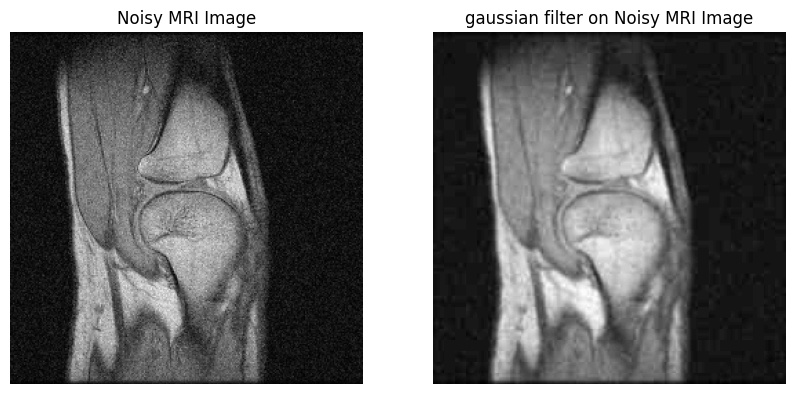

The SNR value : 3.044914180804965 dB
The PSNR value : 27.31573654289403 dB


In [290]:


def gaussian_kernel(size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x - size//2)**2 + (y - size//2)**2)/(2*sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

def apply_gaussian_filter(image, kernel_size, sigma):
    """Apply a Gaussian filter to the input image."""
    if len(image.shape) > 2:
        image = color.rgb2gray(image)
    kernel = gaussian_kernel(kernel_size, sigma)
    filtered_image = convolve(image, kernel)

    return filtered_image

img1_path = 'gaussian.png'
img2_path = 'kneeMRI.png'
img1 = iio.imread(img1_path)
img2 = iio.imread(img2_path)
img3_path = 'knee.png'
img3 = iio.imread(img3_path)

filtered_image = apply_gaussian_filter(img3, kernel_size=5, sigma=1.5)

fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(shifted_reconstructed_image, cmap='gray')
plt.axis('off')  # Turn off axis
plt.title('Noisy MRI Image')
plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.axis('off')  # Turn off axis
plt.title('gaussian filter on Noisy MRI Image')
plt.show()
print(f"The SNR value : {calculate_snr(filtered_image, img2)} dB")
print(f"The PSNR value : {calculate_psnr(filtered_image, img2)} dB")


In [ ]:
##NLM filter

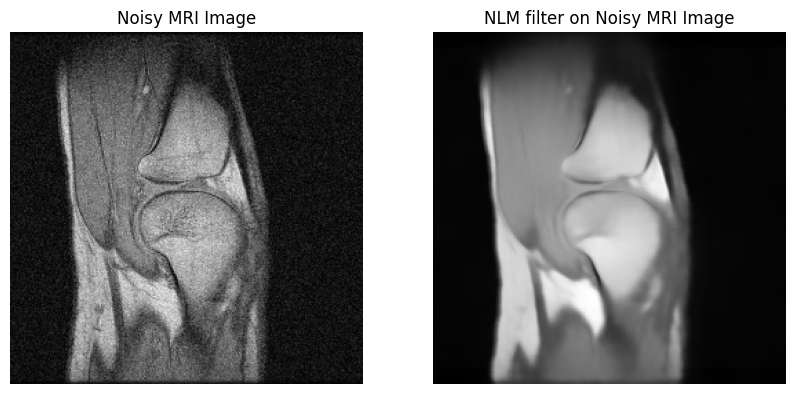

The SNR value : -37.41453294849331 dB
The PSNR value : 20.125437598303076 dB


In [294]:

image = io.imread('knee.png')
img1_path = 'nlm.png'
img2_path = 'kneeMRI.png'
img1 = iio.imread(img1_path)
img2 = iio.imread(img2_path)
image = img_as_float(image)
denoised_image = denoise_nl_means(image, h=0.1)
denoised_image = np.array(denoised_image, dtype=np.float64)
fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(shifted_reconstructed_image, cmap='gray')
plt.axis('off')  # Turn off axis
plt.title('Noisy MRI Image')
plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.axis('off')  # Turn off axis
plt.title('NLM filter on Noisy MRI Image')
plt.show()
print(f"The SNR value : {calculate_snr(np.array(denoised_image, dtype=np.float64), img2)} dB")
print(f"The PSNR value : {calculate_psnr(np.array(denoised_image, dtype=np.float64), img2)} dB")